In [512]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt

In [513]:
import statistics
#mean, median, mode

In [514]:
df = sns.load_dataset('tips')

In [515]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [516]:
df.head(20)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [517]:
np.mean(df['total_bill'])

19.78594262295082

In [518]:
np.median(df['tip'])

2.9

In [519]:
statistics.mode(df['day'])  # 23 45 67 45 34 23 45 70

'Sat'

In [520]:
statistics.mode(df['sex'])

'Male'

<Axes: >

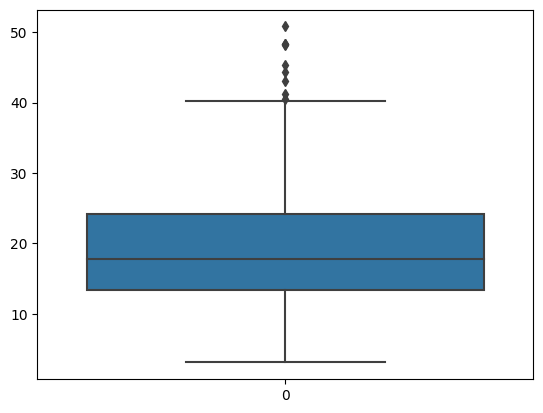

In [521]:
sns.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

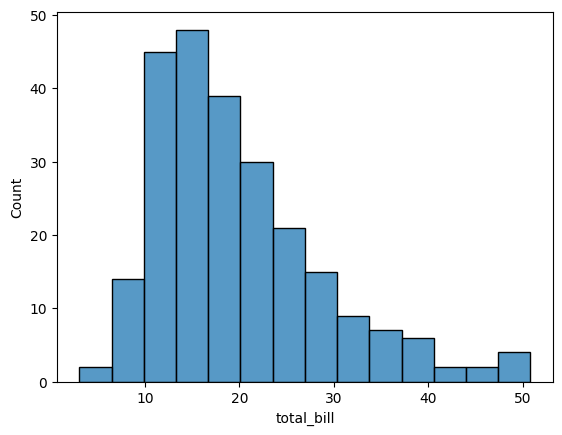

In [522]:
sns.histplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

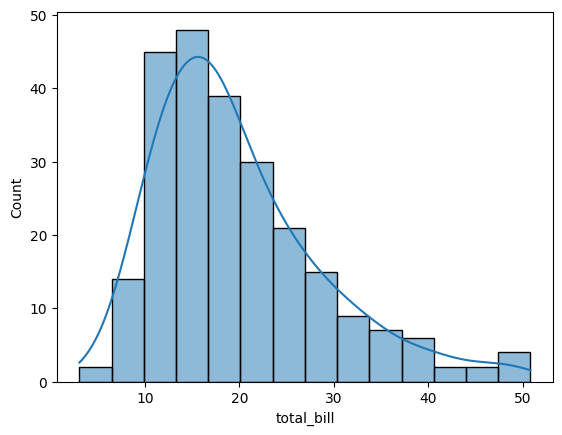

In [523]:
sns.histplot(df['total_bill'], kde = True)

In [524]:
df1 = sns.load_dataset('iris')

In [525]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

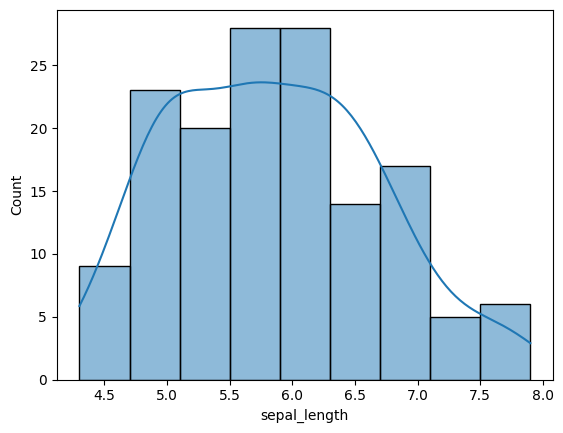

In [526]:
sns.histplot(df1['sepal_length'], kde = True)

<Axes: xlabel='sepal_width', ylabel='Count'>

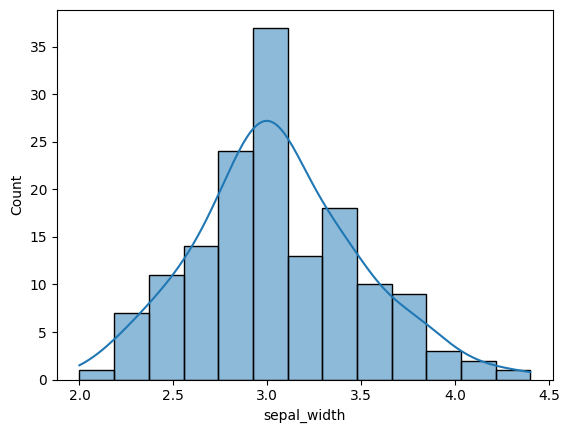

In [527]:
#above histogram does not follows gaussian Distribution, hence it is not normally distributed

sns.histplot(df1['sepal_width'], kde = True)

In [528]:
#above histplot follows gaussian Distribution, hence it is normally distributed


In [529]:
df1['species'].head

<bound method NDFrame.head of 0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object>

In [530]:
df1['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [531]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()

In [532]:
df1['species']= label_encoder.fit_transform(df1['species'])

In [533]:
df1['species'].unique()

array([0, 1, 2])

In [534]:
df1['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [535]:
np.percentile(df1['sepal_length'],[25,75])

array([5.1, 6.4])

In [536]:
#Outliers

In [537]:

dataset = [1,20,30,40,23,21,69,87,44,32,56,2,9,6,4,11,12,77,88,99,44,33,22,67,50,39,45,77,76,78,80,200]

<Axes: >

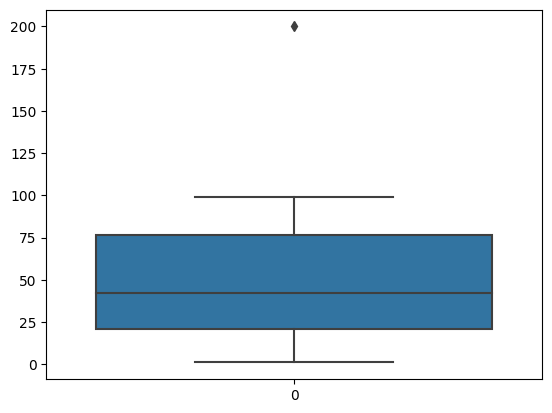

In [538]:
sns.boxplot(dataset)

<Axes: ylabel='Count'>

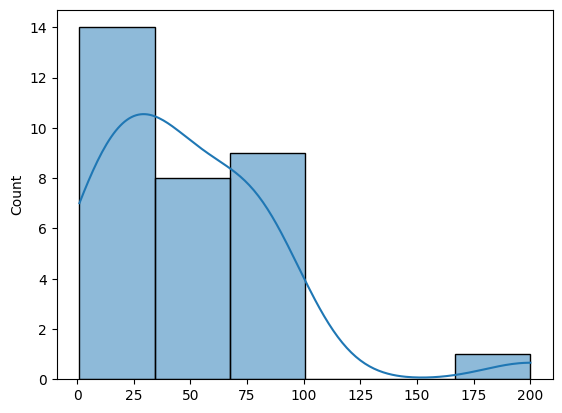

In [539]:
sns.histplot(dataset,kde=True)

In [540]:
outliers = []

In [541]:
#Z score Computation
def detect_outliers(data):
    threshold = 3 #beyond 3rd std deviation
    mean = np.mean(data)
    std = np.std(data)

    for i in dataset:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)

    return outliers

In [542]:
detect_outliers(dataset)

[200]

In [543]:
#IQR

#sort the data, Q1, Q3 , IQR , Lower Fence(q1-1.5(IQR)), Find Upper fence (q3+1.5(IQR)) 


In [544]:
dataset = sorted(dataset)
dataset

[1,
 2,
 4,
 6,
 9,
 11,
 12,
 20,
 21,
 22,
 23,
 30,
 32,
 33,
 39,
 40,
 44,
 44,
 45,
 50,
 56,
 67,
 69,
 76,
 77,
 77,
 78,
 80,
 87,
 88,
 99,
 200]

In [545]:
q1, q3 = np.percentile(dataset, [25, 75])

In [546]:
print(q1, q3)

20.75 76.25


In [547]:
iqr = q3-q1
print(iqr)

55.5


In [548]:
#find the lower fence and higher fence
lower_fence = q1 - (1.5*iqr)
higher_fence = q3 + (1.5*iqr)

In [549]:
print(lower_fence, higher_fence)

-62.5 159.5


In [550]:
import pandas as pd

dataset = pd.DataFrame(dataset)


In [551]:
upper_array = np.where(dataset >= higher_fence)[0]
lower_array = np.where(dataset <= lower_fence)[0]


In [552]:
# Removing the outliers
dataset.drop(index=upper_array, inplace=True)
dataset.drop(index=lower_array, inplace=True)

In [553]:
print(dataset)

     0
0    1
1    2
2    4
3    6
4    9
5   11
6   12
7   20
8   21
9   22
10  23
11  30
12  32
13  33
14  39
15  40
16  44
17  44
18  45
19  50
20  56
21  67
22  69
23  76
24  77
25  77
26  78
27  80
28  87
29  88
30  99


INFERNTIAL STATISTICS

In [554]:
from statsmodels.stats.weightstats import ztest as ztest
#mean =100 , std = 15

In [555]:
data = [88, 92, 94, 94 , 96, 97, 97 , 97, 99, 99, 105, 109,
         109, 109, 110, 112, 112, 113, 114, 115]

ztest(data, value=100)

(1.5976240527147705, 0.11012667014384257)

(z-score, p-value)

t-test

In [556]:
ages = [10,20,35,50,60,23,12,52,20,40,30,35,40,23,34,19,28,28,26,10,29]

In [557]:
import numpy as np
ages_mean = np.mean(ages)
ages_mean

29.714285714285715

In [558]:
sample_size = 10
ages_sample = np.random.choice(ages,sample_size)
ages_sample

array([60, 40, 23, 40, 28, 35, 52, 19, 12, 12])

In [559]:
from scipy.stats import ttest_1samp

In [560]:
_, p_value = ttest_1samp(ages_sample,29.7)

In [561]:
p_value

0.6522658889723114

In [562]:
if p_value > 0.005:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis


In [563]:
_, p_value = ttest_1samp(ages_sample,14)

In [564]:
p_value

0.006570379296202719

In [565]:
if p_value > 0.005:
    print("Reject null hypothesis")
else:
    print("Accept null hypothesis")

Reject null hypothesis
